# Problem : Forecast Store Sales

#### EDA Objectives

- To check for features that can help in forecasting sales
- To check for anomalies or outliers that may impact forecasting model

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import missingno as miss
sns.set_theme(style="darkgrid")
%matplotlib inline

<br />

### Preliminary Data Processing

<br />

In [2]:
df = pd.read_csv('./data/train.csv', low_memory=False)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
# compute average sales per customer
df['Avg. Sales'] = df['Sales'] / df['Customers']
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Avg. Sales
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118


#### store name is a string identifier

In [4]:
df.Store = df.Store.astype('str')

## Missing Values

#### generate a preview if there's any missing values

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Avg. Sales
291,292,5,2015-07-31,0,0,0,1,0,1,NaN
875,876,5,2015-07-31,0,0,0,1,0,1,NaN
1406,292,4,2015-07-30,0,0,0,1,0,1,NaN


<AxesSubplot:>

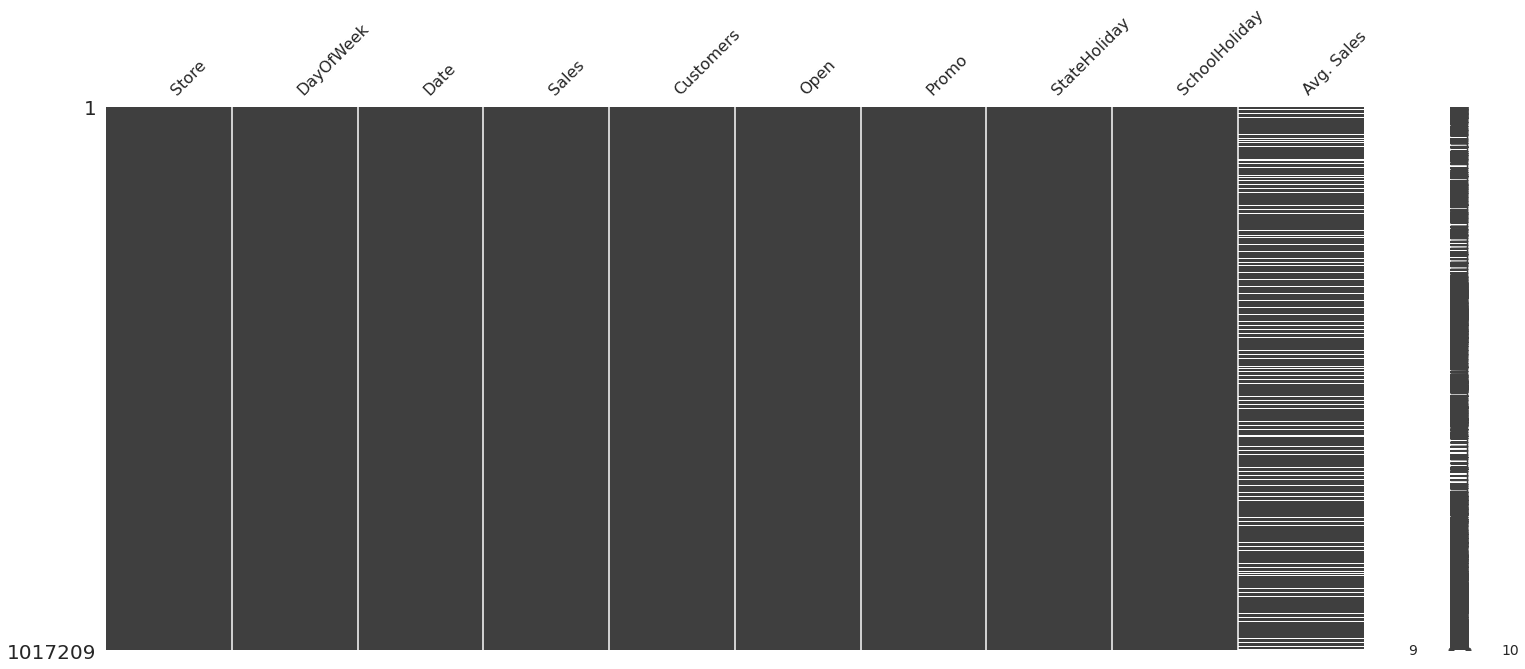

In [5]:
display(df[df.isnull().any(axis=1)].head(3))
miss.matrix(df)

#### drop duplicate values

In [6]:
df.drop_duplicates(inplace=True)

#### set their type as “category" for columns that take on a limited, and usually fixed, number of possible values

In [7]:
df['Open'] = df['Open'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['StateHoliday'] = df['StateHoliday'].astype(str).str.strip().astype('category')
df['SchoolHoliday'] = df['SchoolHoliday'].astype('category')

#### lastly, change datetime format

In [8]:
df.Date = pd.to_datetime(df.Date)

### Categorical EDA

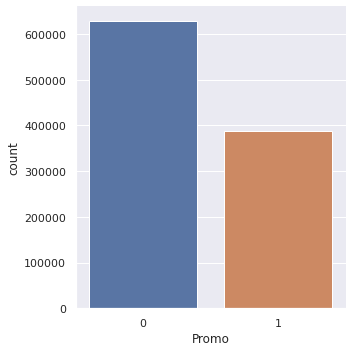

In [9]:
for col in df.select_dtypes(include='category').columns:
    if col == 'Promo':
        fig = sns.catplot(x=col, kind="count", data=df)
        plt.show()

### Observation: Promos play a vital role in bringing customers in

<br />

### Numerical EDA

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.000000,4.00,6.000000,7.000000
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.000000,5744.00,7856.000000,41551.000000
Customers,1017209.0,633.145946,464.411734,0.0,405.000000,609.00,837.000000,7388.000000
Avg. Sales,844340.0,9.493619,2.197494,0.0,7.895563,9.25,10.899729,64.957854


<AxesSubplot:xlabel='Promo', ylabel='Sales'>

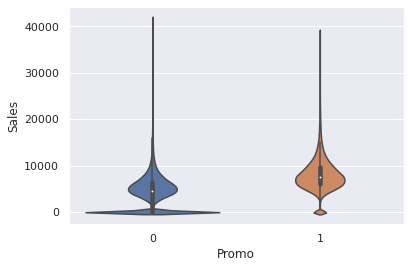

In [11]:
sns.violinplot(x=df.Promo, y=df.Sales, data=df)

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

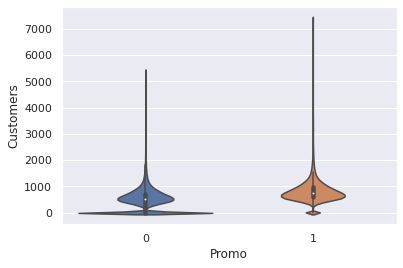

In [12]:
sns.violinplot(x=df.Promo, y=df.Customers, data=df)

### Observation: The difference between the max value and the 75% percentile is quite large, which means there are outliers in this dataset

#### the violin plots verify our hypothesis

<br />

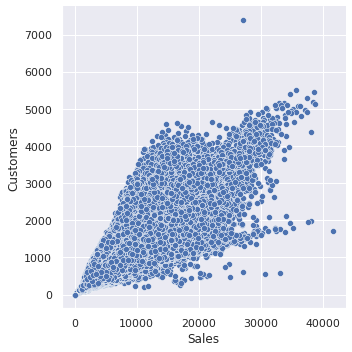

In [13]:
sns.relplot(x= df.Sales, y=df.Customers, data=df);

### Observation: Customer to sales ratio is relatively linear

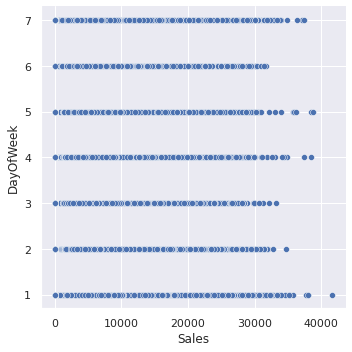

In [14]:
sns.relplot(x= df.Sales, y=df.DayOfWeek, data=df);

### Observation: Sales are about the same through out the week

In [15]:
df_sales = df.sort_values(['Sales'], ascending=False)
df_sales.reset_index(inplace=True)
df_sales.drop('index', axis=1, inplace=True)
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Avg. Sales
0,909,1,2015-06-22,41551,1721,1,0,0,0,24.143521
1,262,5,2015-04-03,38722,5132,1,1,b,0,7.545207
2,262,5,2015-05-01,38484,5458,1,1,a,0,7.050934
3,262,4,2015-05-14,38367,5192,1,0,a,1,7.389638
4,57,1,2014-06-16,38037,1970,1,1,0,0,19.308122


In [16]:
df_avg_sales = df.sort_values(['Avg. Sales'], ascending=False)
df_avg_sales.reset_index(inplace=True)
df_avg_sales.drop('index', axis=1, inplace=True)
df_avg_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Avg. Sales
0,897,1,2013-09-02,16954,261,1,0,0,0,64.957854
1,126,4,2013-10-24,33071,574,1,1,0,1,57.614983
2,126,2,2013-10-22,30619,554,1,1,0,1,55.268953
3,897,3,2013-05-08,17148,319,1,0,0,0,53.755486
4,126,1,2013-10-14,25049,475,1,0,0,0,52.734737


### df_sales and df_avg_sales gives us a list of stores with the highest sales ratio. For optimal business growth, we focus our efforts on the high performers. 

### Recommendation: 
        - Boost sales further in the more successful stores in each category
        - Figure out how to boost growth in the medium range stores
        - Figure out what is going wrong in the stores that don't seem to be generating any sales

<br />

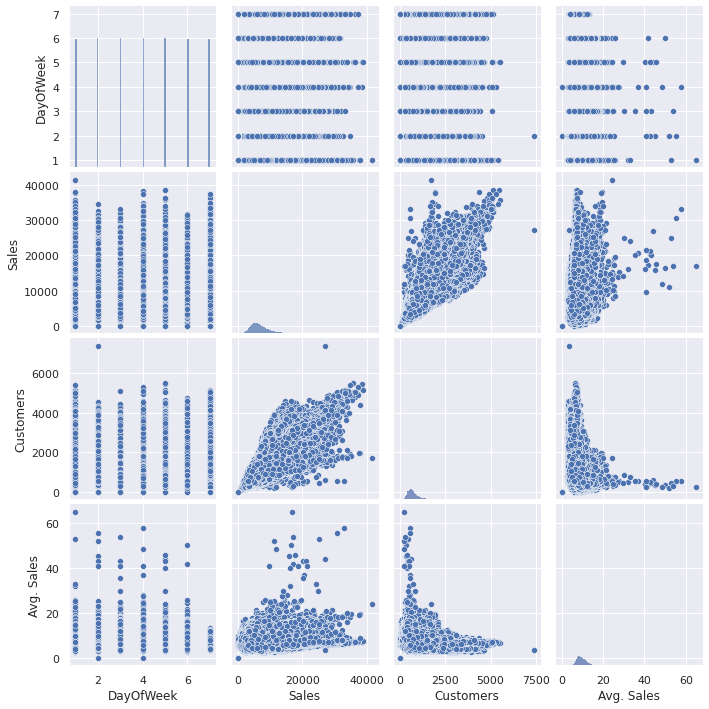

In [17]:
# for further insights we pairplot
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

<br />

### Time Series EDA

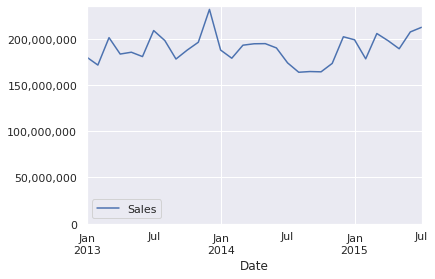

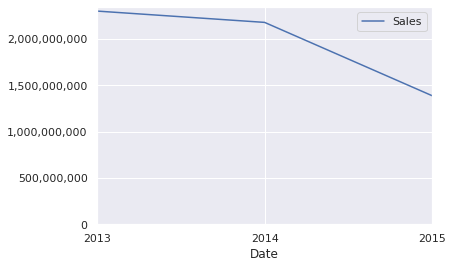

In [21]:
if len(df.select_dtypes(include='datetime64').columns)>0:
    for col in df.select_dtypes(include='datetime64').columns:
        for p in ['M', 'Y']:
            for col_num in df.select_dtypes(include=np.number).columns:
                if col_num == 'Sales':
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

### Observations

- Sales spike end of yearand have a drop around Feb
- Overall sales have dropped in the period in which the data has been gathered
- When predicting forecasting, the seasonality of the sales needs to be taken into effect